In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import datetime
import pymongo
from pymongo import MongoClient
import datetime as dt

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# MONGO_HOST = "13.127.94.116"
MONGO_DB = "ReceptionFB"

client = MongoClient('localhost', 55257)
db = client[MONGO_DB]

In [3]:
df = pd.DataFrame(list(db.pageDetails.find({}, {"_id":False})))

In [4]:
df.tail()

,date,device,page
4808,2018-07-18 01:35:27.272,LelaGroundFloor,LinearLayout1
4809,2018-07-18 03:06:20.238,LelaGroundFloor,You are here Clicked
4810,2018-07-18 03:06:25.763,LelaGroundFloor,Location Clicked
4811,2018-07-18 03:17:03.776,LelaGroundFloor,Company Clicked
4812,2018-07-18 03:17:08.387,LelaGroundFloor,enphasethirdfloor


In [5]:
df2=df.copy()

In [6]:
df2.device.value_counts()

GroundFloorLela          1539
LelaGroundFloor          1302
6thFloorLeelaWashroom    1061
6thfloorleelawashroom     389
washroom                  360
Missing Type File         161
leela6thfloor               1
Name: device, dtype: int64

In [7]:
for i in range(0, len(df2)):
    if df2.iloc[i][1]=='washroom':
        df2.iloc[i,1]='6thFloorLeelaWashroom'
        

In [8]:
df2=df2[df2.device!='Missing Type File']

In [9]:
df2.device.value_counts()

GroundFloorLela          1539
6thFloorLeelaWashroom    1421
LelaGroundFloor          1302
6thfloorleelawashroom     389
leela6thfloor               1
Name: device, dtype: int64

In [10]:
df2['date']=df2['date']+dt.timedelta(minutes=330)
x=df2['date'].dt.strftime('%d-%m-%Y %H:%M:%S')

In [11]:
a=[]
for i in x:
    a.append(i.split())
y=np.array(a)

In [12]:
df2['date']=y[:,0]
df2['TIME']=y[:,1]

In [13]:
df2['date']=df2['date'].apply(lambda x: dt.datetime.strptime(x, "%d-%m-%Y").date())
df2['TIME']=df2['TIME'].apply(lambda x: dt.datetime.strptime(x, "%H:%M:%S").time())
df2.tail()

,date,device,page,TIME
4808,2018-07-18,LelaGroundFloor,LinearLayout1,07:05:27
4809,2018-07-18,LelaGroundFloor,You are here Clicked,08:36:20
4810,2018-07-18,LelaGroundFloor,Location Clicked,08:36:25
4811,2018-07-18,LelaGroundFloor,Company Clicked,08:47:03
4812,2018-07-18,LelaGroundFloor,enphasethirdfloor,08:47:08


In [14]:
df2=df2[['date', 'TIME', 'device', 'page']]

In [15]:
df2.head()

,date,TIME,device,page
0,2018-05-31,10:31:58,GroundFloorLela,FeedBack Clicked
1,2018-05-31,10:33:47,GroundFloorLela,
2,2018-05-31,10:33:49,GroundFloorLela,cleo
3,2018-05-31,10:42:26,GroundFloorLela,
4,2018-05-31,10:42:30,GroundFloorLela,saifpartner


## Generating Weekly Results

In [16]:
#====================================================================================================================
#=====================================================================================================================
df3=df2[df2.date>dt.date(2018, 7, 8)]
df3=df3[df3.date<dt.date(2018, 7, 16)]

In [17]:
df3.groupby('date').device.value_counts()

date        device               
2018-07-09  LelaGroundFloor          165
            6thFloorLeelaWashroom     23
2018-07-10  LelaGroundFloor          108
            6thFloorLeelaWashroom     60
2018-07-11  LelaGroundFloor           81
2018-07-12  LelaGroundFloor           95
            6thFloorLeelaWashroom     13
2018-07-13  LelaGroundFloor           70
2018-07-14  LelaGroundFloor           46
2018-07-15  LelaGroundFloor           13
Name: device, dtype: int64

In [18]:
df3.head()

,date,TIME,device,page
3831,2018-07-09,07:54:36,LelaGroundFloor,Company Clicked
3832,2018-07-09,08:48:08,LelaGroundFloor,LinearLayout1
3833,2018-07-09,08:48:08,LelaGroundFloor,LinearLayout1
3834,2018-07-09,08:48:08,LelaGroundFloor,Company Clicked
3835,2018-07-09,08:48:46,LelaGroundFloor,Location Clicked


In [19]:
df3.index=range(0, len(df3))

In [20]:
df3.head()

,date,TIME,device,page
0,2018-07-09,07:54:36,LelaGroundFloor,Company Clicked
1,2018-07-09,08:48:08,LelaGroundFloor,LinearLayout1
2,2018-07-09,08:48:08,LelaGroundFloor,LinearLayout1
3,2018-07-09,08:48:08,LelaGroundFloor,Company Clicked
4,2018-07-09,08:48:46,LelaGroundFloor,Location Clicked


In [21]:
for i in range(0, len(df3)):
    if df3.iloc[i][2]=='6thFloorLeelaWashroom':
        df3.iloc[i][2]='6thfloorleelawashroom'

In [22]:
for i in range(0, len(df3)):
    if df3.iloc[i][2]=='GroundFloorLela':
        df3.iloc[i][2]='LelaGroundFloor'

In [23]:
df3.device.value_counts()

LelaGroundFloor          578
6thfloorleelawashroom     96
Name: device, dtype: int64

In [24]:
ground=df3[df3.device=='LelaGroundFloor']

In [25]:
upper=df3[df3.device=='6thfloorleelawashroom']

In [26]:
ground.device.value_counts()

LelaGroundFloor    578
Name: device, dtype: int64

In [27]:
upper.device.value_counts()

6thfloorleelawashroom    96
Name: device, dtype: int64

In [29]:
ground.head()

,date,TIME,device,page
0,2018-07-09,07:54:36,LelaGroundFloor,Company Clicked
1,2018-07-09,08:48:08,LelaGroundFloor,LinearLayout1
2,2018-07-09,08:48:08,LelaGroundFloor,LinearLayout1
3,2018-07-09,08:48:08,LelaGroundFloor,Company Clicked
4,2018-07-09,08:48:46,LelaGroundFloor,Location Clicked


In [79]:
ground.groupby('date').device.value_counts()

date        device         
2018-07-09  LelaGroundFloor    165
2018-07-10  LelaGroundFloor    108
2018-07-11  LelaGroundFloor     81
2018-07-12  LelaGroundFloor     95
2018-07-13  LelaGroundFloor     70
2018-07-14  LelaGroundFloor     46
2018-07-15  LelaGroundFloor     13
Name: device, dtype: int64

## Ground Floor

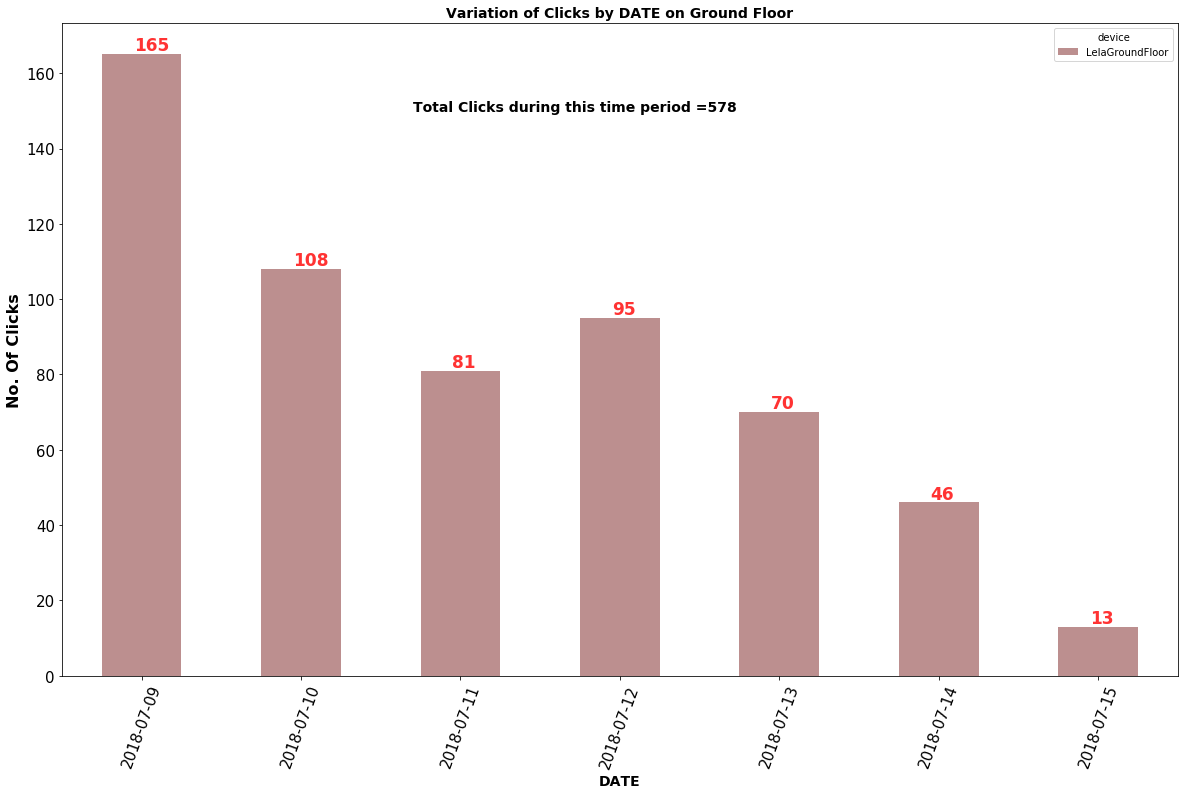

In [80]:
ax6=ground.groupby('date').device.value_counts().unstack(1).plot(figsize=[20,12],kind='bar',fontsize=15, rot=70, color='rosybrown')
ax6.set_xlabel('DATE', fontsize=14, fontweight='bold')
ax6.set_ylabel('No. Of Clicks', fontsize=16, fontweight='bold')
ax6.set_title("Variation of Clicks by DATE on Ground Floor", fontsize=14, fontweight='bold')
ax6.text(1.7, 150, 'Total Clicks during this time period ='+str(len(ground)),  fontsize=14, color='black', fontweight='bold' )
for i in ax6.patches:
    ax6.text(i.get_x()+0.2, i.get_height()+1, str(int(i.get_height())),fontsize=17, color='red', fontweight='bold', alpha=0.8)
plt.savefig("ground1.pdf", bbox_inches='tight')

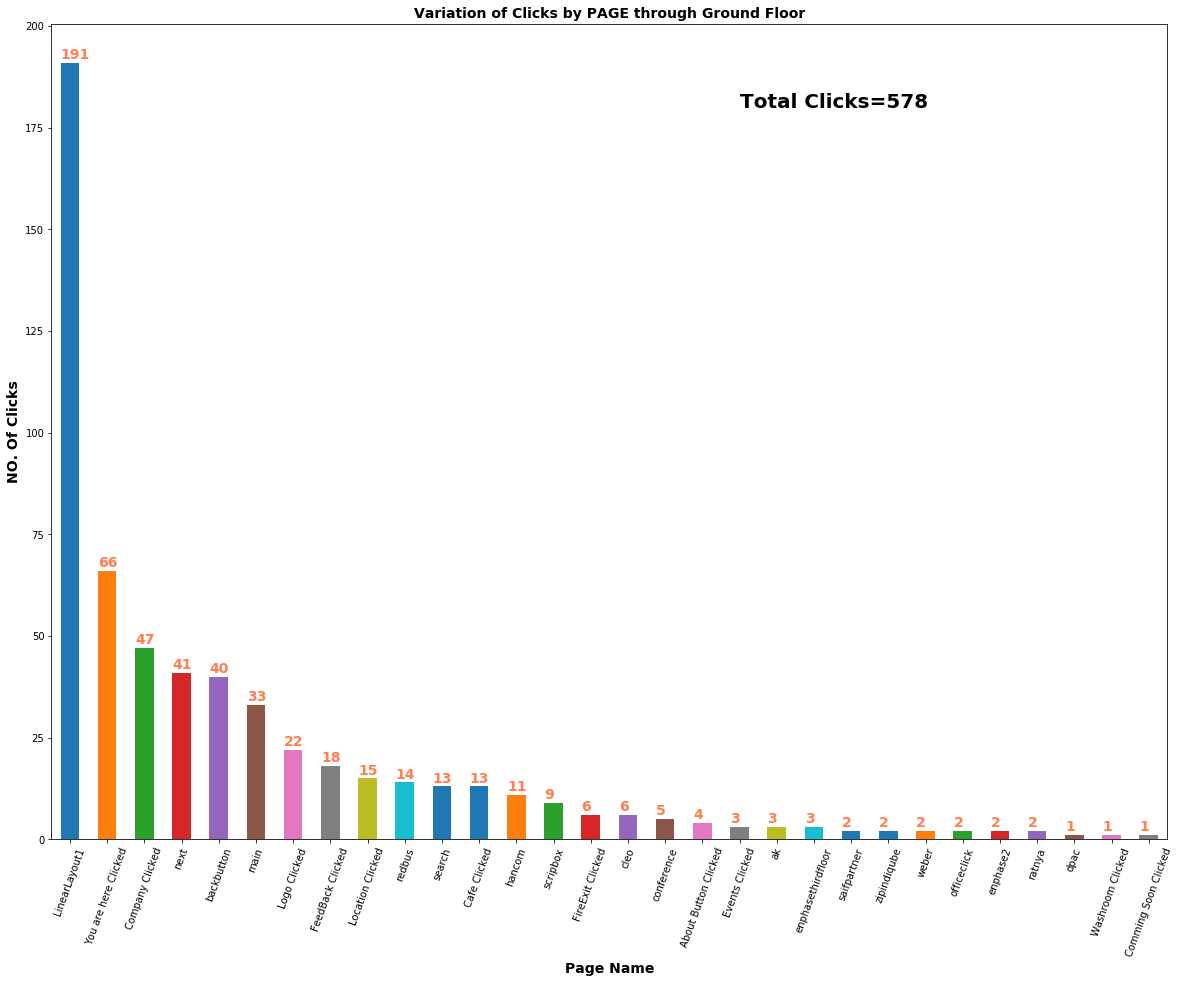

In [32]:
ax=ground['page'].value_counts().plot(kind='bar', figsize=(20, 15), rot=70)
ax.set_ylabel("NO. Of Clicks", fontsize=14, fontweight='bold')
ax.set_xlabel("Page Name", fontsize=14, fontweight='bold')
ax.set_title("Variation of Clicks by PAGE through Ground Floor", fontsize=14, fontweight='bold')
ax.text(18, 180, 'Total Clicks='+str(len(ground)),fontsize=20, fontweight='bold')
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1, str(i.get_height()), fontsize=14, color='coral', fontweight='bold')
plt.savefig("ground2.pdf", bbox_inches='tight')

In [48]:
ground.TIME=pd.to_datetime(ground.TIME, format='%H:%M:%S')

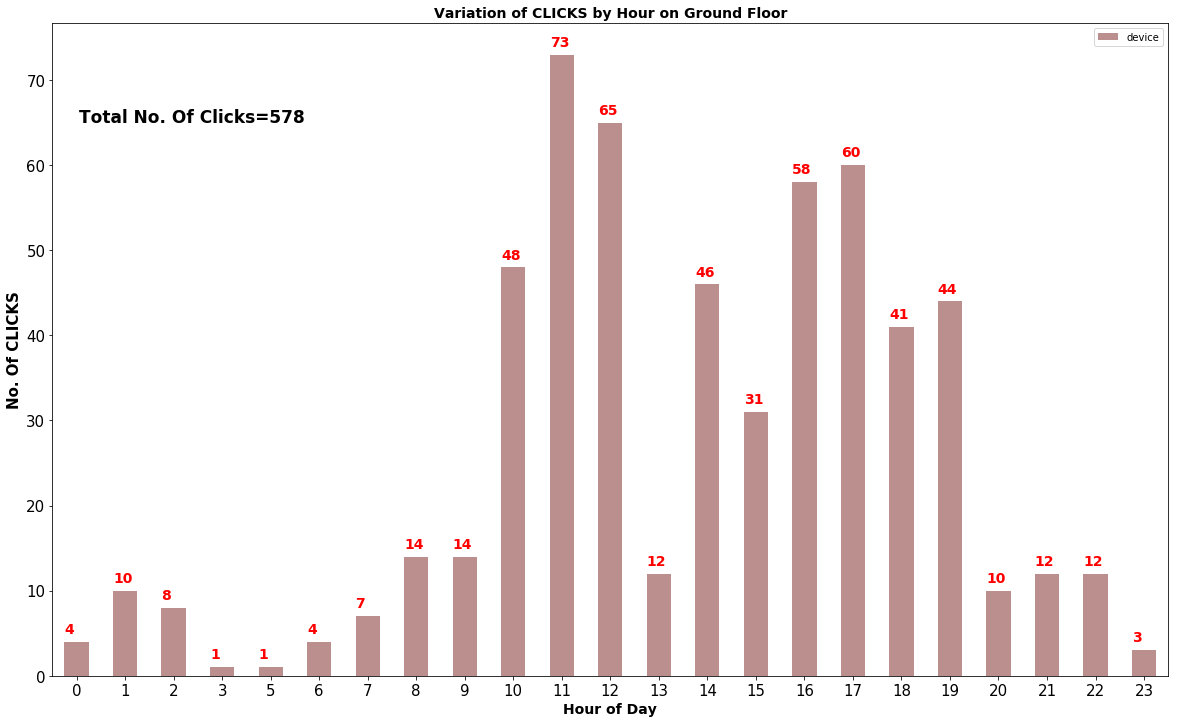

In [47]:
ground['click_Hour'] = ground.TIME.dt.hour
ax5=ground.groupby(['click_Hour']).device.count().plot(figsize=[20,12],kind='bar',legend='side',fontsize=15, rot=0, color='rosybrown')
ax5.set_xlabel("Hour of Day",fontsize=14, fontweight='bold')
ax5.set_ylabel("No. Of CLICKS",fontsize=15, fontweight='bold')
ax5.set_title('Variation of CLICKS by Hour on Ground Floor', fontsize=14, fontweight='bold')   

ax5.text(0.06, 65,"Total No. Of Clicks="+str(len(ground)),fontsize=17, fontweight='bold')
for i in ax5.patches:
    ax5.text(i.get_x(), i.get_height()+1, str(i.get_height()), fontsize=14, color='red', fontweight='bold')

plt.savefig("ground3.pdf", bbox_inches='tight')


## 6th Floor

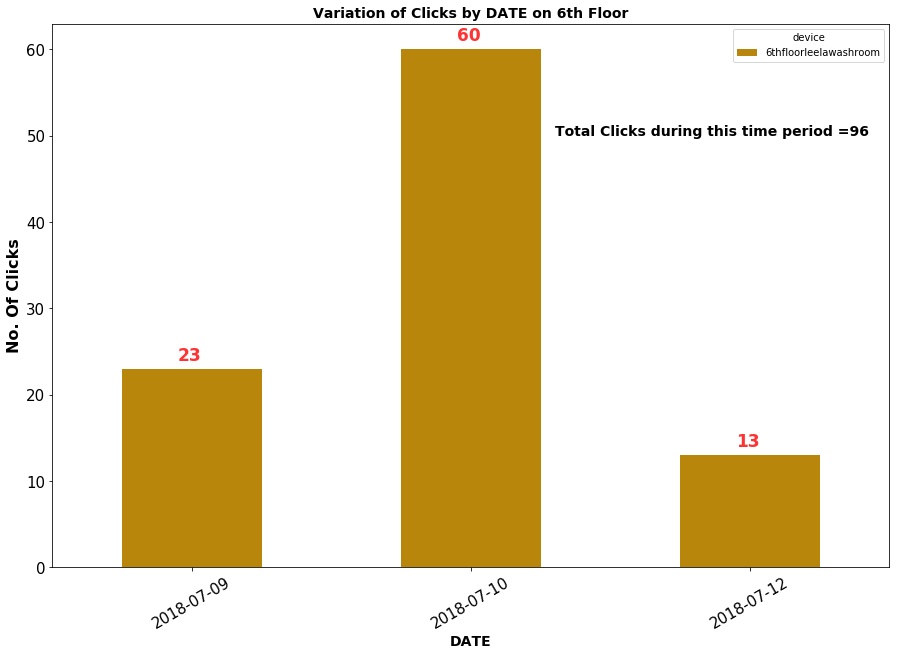

In [82]:
ax6=upper.groupby('date').device.value_counts().unstack(1).plot(figsize=[15,10],kind='bar',fontsize=15, rot=30, color='darkgoldenrod')
ax6.set_xlabel('DATE', fontsize=14, fontweight='bold')
ax6.set_ylabel('No. Of Clicks', fontsize=16, fontweight='bold')
ax6.set_title("Variation of Clicks by DATE on 6th Floor", fontsize=14, fontweight='bold')
ax6.text(1.3, 50, 'Total Clicks during this time period ='+str(len(upper)),  fontsize=14, color='black', fontweight='bold' )
for i in ax6.patches:
    ax6.text(i.get_x()+0.2, i.get_height()+1, str(int(i.get_height())),fontsize=17, color='red', fontweight='bold', alpha=0.8)
plt.savefig("6thfloor1.pdf", bbox_inches='tight')

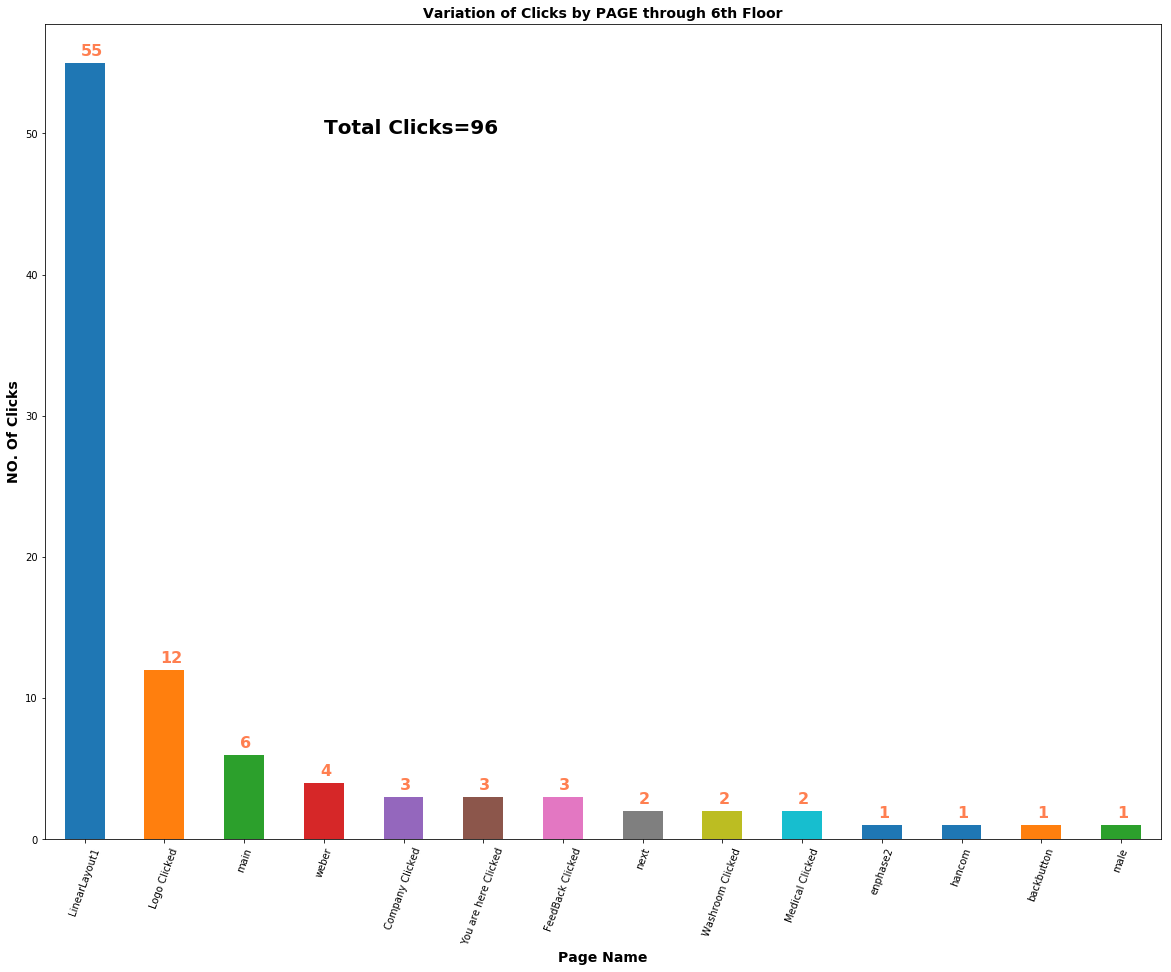

In [61]:
ax=upper['page'].value_counts().plot(kind='bar', figsize=(20, 15), rot=70)
ax.set_ylabel("NO. Of Clicks", fontsize=14, fontweight='bold')
ax.set_xlabel("Page Name", fontsize=14, fontweight='bold')
ax.set_title("Variation of Clicks by PAGE through 6th Floor", fontsize=14, fontweight='bold')
ax.text(3, 50, 'Total Clicks='+str(len(upper)),fontsize=20, fontweight='bold')
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+0.5, str(i.get_height()), fontsize=16, color='coral', fontweight='bold')
plt.savefig("6thfloor2.pdf", bbox_inches='tight')

In [62]:
upper.TIME=pd.to_datetime(upper.TIME, format='%H:%M:%S')

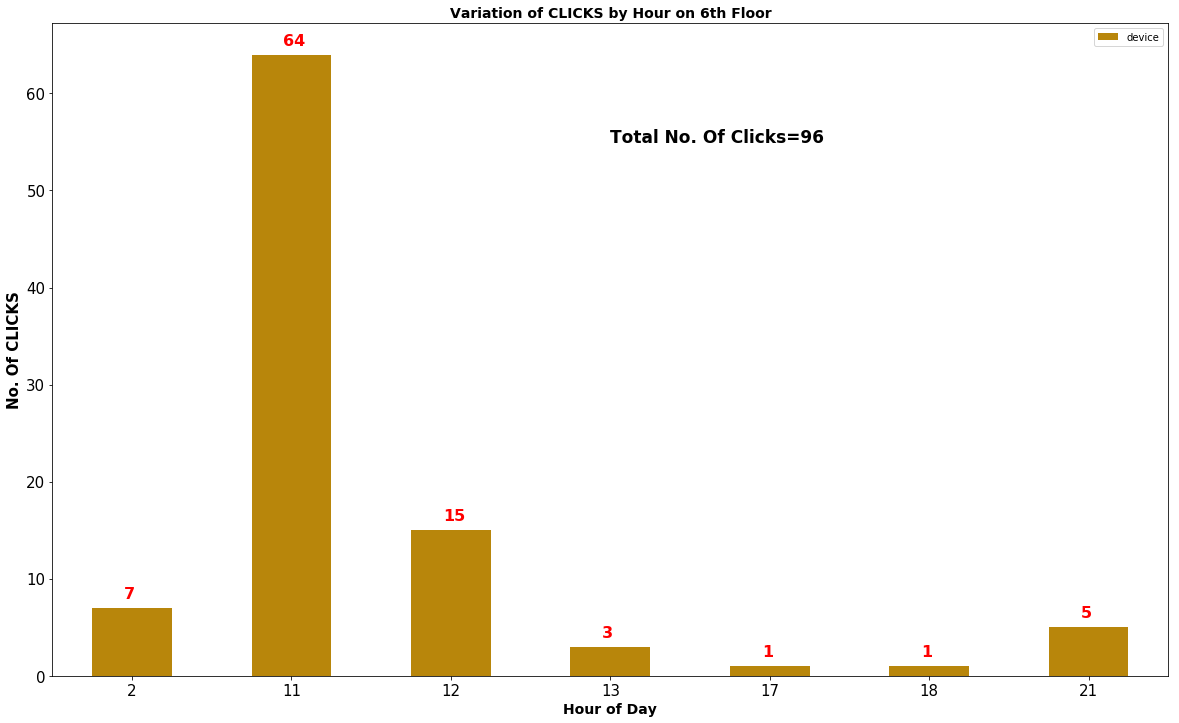

In [68]:
upper['click_Hour'] = upper.TIME.dt.hour
ax5=upper.groupby(['click_Hour']).device.count().plot(figsize=[20,12],kind='bar',legend='side',fontsize=15, rot=0, color='darkgoldenrod')
ax5.set_xlabel("Hour of Day",fontsize=14, fontweight='bold')
ax5.set_ylabel("No. Of CLICKS",fontsize=15, fontweight='bold')
ax5.set_title('Variation of CLICKS by Hour on 6th Floor', fontsize=14, fontweight='bold')   

ax5.text(3, 55,"Total No. Of Clicks="+str(len(upper)),fontsize=17, fontweight='bold')
for i in ax5.patches:
    ax5.text(i.get_x()+0.2, i.get_height()+1, str(i.get_height()), fontsize=16, color='red', fontweight='bold')

plt.savefig("6thfloor3.pdf", bbox_inches='tight')

## Total

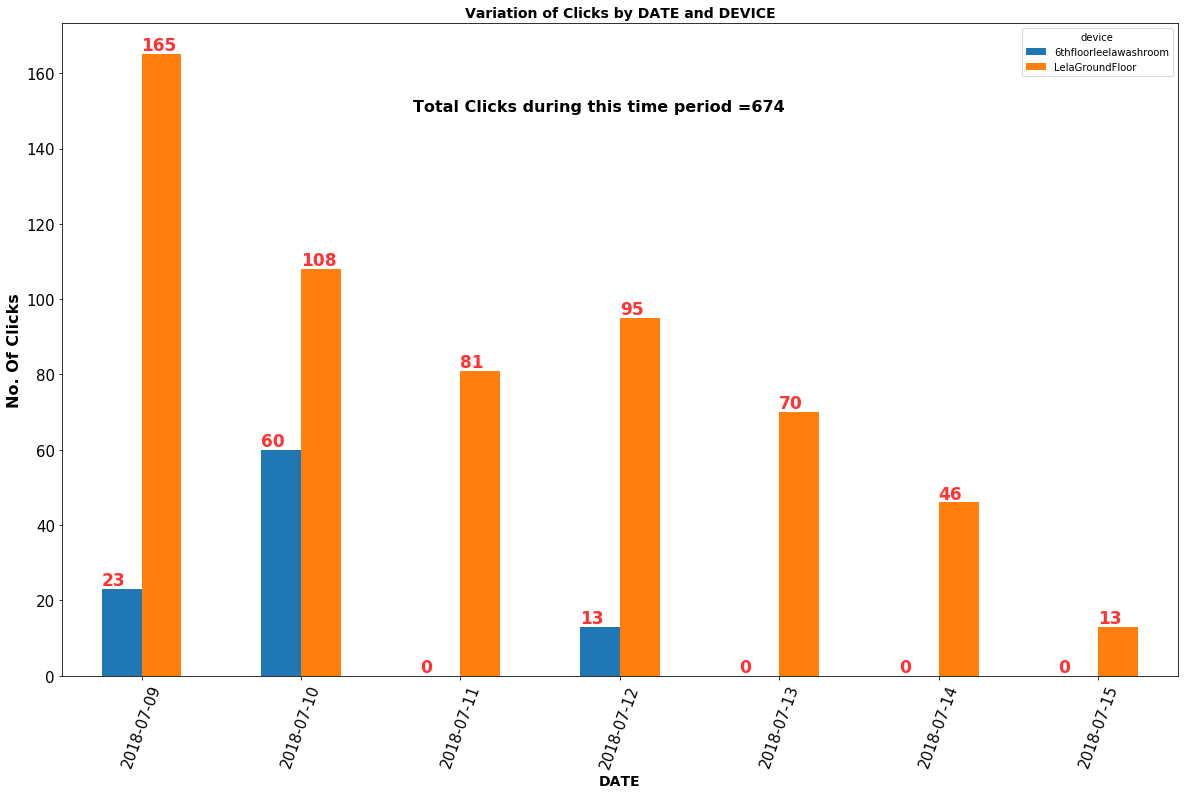

In [76]:
ax6=df3.groupby('date').device.value_counts().unstack(1).plot(figsize=[20,12],kind='bar',fontsize=15, rot=70)
ax6.set_xlabel('DATE', fontsize=14, fontweight='bold')
ax6.set_ylabel('No. Of Clicks', fontsize=16, fontweight='bold')
ax6.set_title("Variation of Clicks by DATE and DEVICE", fontsize=14, fontweight='bold')
ax6.text(1.7, 150, 'Total Clicks during this time period ='+str(len(df3)),  fontsize=16, color='black', fontweight='bold' )
for i in ax6.patches:
    ax6.text(i.get_x(), i.get_height()+1, str(int(i.get_height())),fontsize=17, color='red', fontweight='bold', alpha=0.8)
plt.savefig("total.pdf", bbox_inches='tight')